# Workflow - Sandbox Zenodo


En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos.

Para ello, utilizaremos la versión de _testing_ de Zenodo (https://sandbox.zenodo.org/) para evitar problemas de baneo de IPs. También, GitHub para almacenar código que ejecutaremos de forma automática.

Antes de empezar, selecciona un dataset sencillo y un script básico que sea capaz de procesar ese dataset. Por ejemplo: Un CSV y un script que haga un plot con los datos y lo guarde como imagen. Puedes coger algo de alguna práctica de otra asignatura.

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


# Publicación de datos iniciales

Utilizando Zenodo (https://sandbox.zenodo.org/), de forma manual, publicar los datos que se vayan a utilizar. En la página principal, una vez logueado (te tendrás que registrar, mejor utilizando tu login de GitHub), en el símbolo +, New upload. Rellena los campos y publica.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>

Haz un print del DOI que te da al subir el dataset.


In [1]:
doi_z = "10.5072/zenodo.150153"

print(doi_z)

10.5072/zenodo.150153


# Publicación de script de Análisis

Selecciona el script sencillo de análisis que sea capaz de procesar el dataset que has subido. Guardalo en GitHub.

Desde tu perfil de usuario en Zenodo (SandBox), selecciona la opción GitHub. Si no lo tienes ya, necesitarás conectar tu usuario de GitHub. Desde allí, te indica cómo puedes generar un objeto digital con su DOI de un repositorio de Github. Entre otras cosas, te lleva a crear una "release" de tu código. Una vez está todo, obtendrás un DOI de ese repo. Muéstralo debajo.

In [2]:
doi_g = "10.5072/zenodo.161797"

print(doi_g)

10.5072/zenodo.161797


# Descarga de datos

Desde el SANDBOX de Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [3]:
import requests
import json
import csv
from datetime import datetime
import xml.etree.cElementTree as ET

Un par de funciones para búsqueda

In [4]:
def search_dataset(url,oai_set,metadata_format):
    """Search the datasets identifiers in the defined set
        Parameters
        ----------
        url : string
            OAI-PMH endpoint url
        oai_set : string
            OAI-PMH set where the datasets will be searched
        metadata_format : string
            Selected metadata format to search
        Returns
        -------
        dataset_ids : array 
            Dataset IDs
    """
    #Define bounds to search in specific set
    bounds = "&set="+oai_set
    oai = requests.get(url+'?verb=ListRecords&metadataPrefix='+metadata_format+bounds)

    oaiTree = ET.ElementTree(ET.fromstring(oai.text.encode('utf-8')))
    item = oaiTree.findall('.//{http://datacite.org/schema/kernel-3}identifier')
    return item

In [5]:
def get_oai_metadata_formats(url):
    """Lists the available metadata formats
        Parameters
        ----------
        url : string
            OAI-PMH endpoint url
        Returns
        -------
        metadata_formats : 
            Name of the downloaded file(s).
    """
    metadata_formats = []
    oai_verb = '?verb=ListMetadataFormats'
    oai = requests.get(url + oai_verb) #Peticion al servidor
    xmlTree = ET.ElementTree(ET.fromstring(oai.text))
    iterator = xmlTree.iter()
    for elem in iterator:
        if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix'):
            metadata_formats.append(elem.text)
    return metadata_formats

## Completa el código para la búsqueda y descarga de ficheros

In [6]:
import os
def check_dataset(ids,api_url,tipo):
    """Checks if the available datasets satisfy the dates and location req
        Parameters
        ----------
        ids : array
            List of dataset ids
        api_url : string
            API to get dataset metadata
        tipo : string
            type of file to download
        Returns
        -------
        downloaded_datasets : array 
            List of downloaded datasets
    """
    list_of_files = []
    for i in ids:
        print("Checking " + i)
        response = requests.get('https://sandbox.zenodo.org/api/records', params={'q': i.split('.')[-1]})
        url_to_check = response.json()['hits']['hits'][0]['links']['latest']
        headers = {'accept': 'application/json', 'Content-Type': 'application/json'}
        metadata = requests.get(url_to_check, headers=headers)

        # COMPLETA el código
        files = metadata.json()['files'] # Recorre los ficheros (files) presentes en los metadatos
        for file in files:
            if file['key'].endswith(f'.{tipo}'): # Comprueba que el fichero está en el formato definido en tipo
                # Si está en ese formato, descarga el fichero y guardalo
                file_url = file['links']['self']
                # Define el nombre de archivo a guardar
                filename = os.path.basename(file['key'])
                print(f"Downloading {filename}...")
                # Descarga el fichero
                file_response = requests.get(file_url, stream=True)
                
                # Guardar el archivo en el directorio actual
                with open(filename, 'wb') as f:
                    f.write(file_response.content)
                # Añadir el archivo descargado
                print(f"Downloaded {filename}")
                list_of_files.append(filename)
    return list_of_files

Busco el dataset y el código publicado. Si no lo localizas con OAI-PMH, puedes introducir directamente los DOIs.

In [7]:
import sys
#Searching datasets OAI-PMH
print("Searching datasets OAI-PMH")
oai_url = 'https://sandbox.zenodo.org/oai2d'
metadata_formats = get_oai_metadata_formats(oai_url)

#TODO hardcoded
print("Searching Datasets")
oai_set = 'new_community' # Aquí pon la comunidad ## cambio aca
dataset_list = search_dataset(oai_url,oai_set,'oai_datacite3')
print(dataset_list)

print("Checking/download Datasets")
api_url = 'https://sandbox.zenodo.org/'

dataset_list = ["10.5072/zenodo.150153", "10.5072/zenodo.161797"] #Esto lo tienes que cambiar ;)

csv_files = check_dataset(dataset_list,api_url,'csv')
print(csv_files)

zip_files = check_dataset(dataset_list,api_url,'zip')
print(zip_files)

Searching datasets OAI-PMH
Searching Datasets
[]
Checking/download Datasets
Checking 10.5072/zenodo.150153
Downloaded meteo.csv
Checking 10.5072/zenodo.161797
['meteo.csv']
Checking 10.5072/zenodo.150153
Checking 10.5072/zenodo.161797
Downloaded zenodo_workflow-zenodo.zip
['zenodo_workflow-zenodo.zip']


## Descomprime el código, que viene en un zip (tienes que cambiar los nombres)

In [8]:
import zipfile
import os
with zipfile.ZipFile("zenodo_workflow-zenodo.zip", 'r') as zip_ref:
    zip_ref.extractall(".")
print(os.listdir("./JohanaCombita-zenodo_workflow-e6a8a01"))
os.system("mv ./JohanaCombita-zenodo_workflow-e6a8a01/* ./")

['README.md', 'script_Sandbox_Zenodo.py']


0

## Haz algo con el dataset, mostrarlo de algún modo.
Un chart, una imagen, etc.

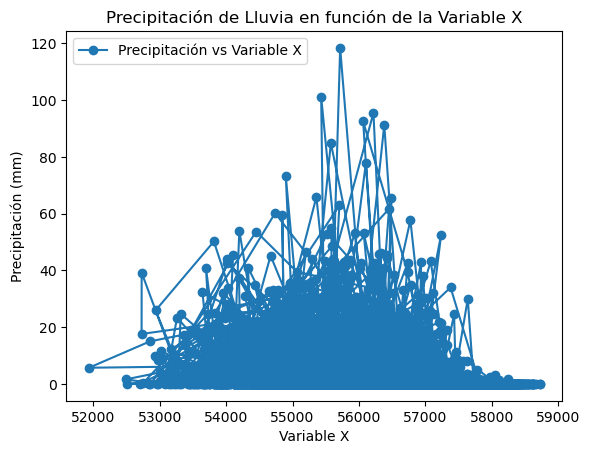

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#Esta es lagrafica usando el dataset
data = pd.read_csv('meteo.csv',delimiter=',')

plt.plot(data['X1'], data['y'], label='Precipitación vs Variable X', marker='o')

plt.title('Precipitación de Lluvia en función de la Variable X')
plt.xlabel('Variable X')
plt.ylabel('Precipitación (mm)')

plt.legend()
plt.show()


Misma gráfica usando el script. 

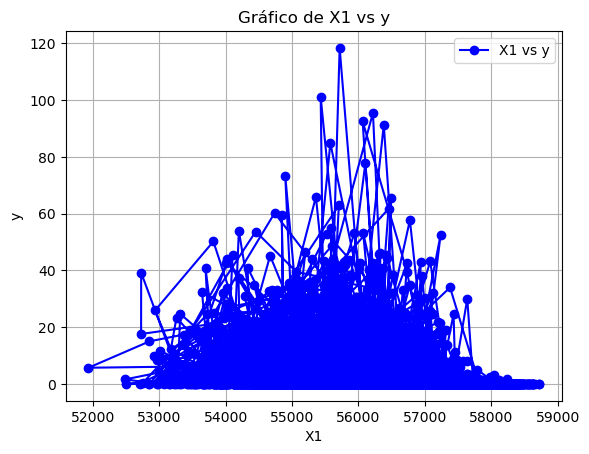

   Unnamed: 0     y            X1            X2            X3            X4  \
0           1  10.9  57042.960938  56534.835938  55884.398438  55175.585938   
1           2   0.6  56963.195312  56493.445312  55930.820312  55340.195312   
2           3  13.0  56522.589844  55971.402344  55304.339844  54498.027344   
3           4   0.0  54627.984375  53979.796875  53494.046875  53072.984375   
4           5   0.0  53584.382812  53391.007812  53310.382812  53292.820312   

             X5            X6            X7            X8  ...           X311  \
0  54458.210938  56980.273438  56460.585938  55800.023438  ...  101985.921875   
1  54768.632812  56856.570312  56361.945312  55776.757812  ...  102048.093750   
2  53725.152344  56514.839844  55977.714844  55327.277344  ...  102399.093750   
3  52616.359375  54776.171875  54089.046875  53516.984375  ...  100969.984375   
4  53340.132812  53781.695312  53498.132812  53306.820312  ...  100652.656250   

            X312           X313       

In [10]:
%run -i script_Sandbox_Zenodo.py meteo.csv

El documento llamado "grafico.jpg" es la imagen que genera el script. Este script toma el dataset de meteo y grafica la imagen anterior. El script se llama "script_Sandbox_Zenodo.py" y el dataset "meteo.csv". El documento zip inicial que se descarga de zenodo es "zenodo_workflow-zenodo.zip".

In [11]:
ls

amt_prototype_with_units.xml
amt_prototype.xml
animales.csv
animales.db
articulo.pdf
chinook.db
chinook.zip
datacite-example-full-v4.xml
datosfinancieros
datosfinancierossectortic.db
DOI20242025.ipynb
dublincore-example.xml
Ejemplo1.ipynb
fuente1.db
fuente2.db
grafico.jpg
imagen_test.jpeg
imagen_test.jpg
integrada.db
JohanaCombita-zenodo_workflow-e6a8a01/
M3.02Workflow_guion2025.ipynb
M3.02Workflow_JohanaCombita.ipynb
M3.02Workflow-santi.ipynb
metadataIntro_20242025.ipynb
meteo.csv
OAI-PMH-APIs2425.ipynb
oasidatosfinancierossectorticaragonesccaa1996-2011.csv
ORM-SQLAlchemy.ipynb
practica_orm.db
README.md
santi.ipynb
script_Sandbox_Zenodo.py
smap-test-not-real.csv
tree_1.0-43.tar.gz
zenodo_workflow-zenodo.zip


# Publicación de los Datos

Utilizando la API de Zenodo SandBox, necesitarás un access token que te permita hacer la publicación. Echa un vistazo a la documentación para ver cómo se consigue. Es fácil...
Después, modifica este código para crear un nuevo depósito con el resultado generado (una imagen, un dataset derivado, un texto con el print de los datos...)

In [12]:
ACCESS_TOKEN = '1KE0cHO5H3LBTeOD0wAVqbj1WMdHReMEbaekdNopHlaIC8ft9l9Qsjy2Czn8'
url = "https://sandbox.zenodo.org/api/deposit/depositions"
headers = {"Content-Type": "application/json"}
params = {'access_token': ACCESS_TOKEN}

# Crear un depósito vacío
r = requests.post(url, params=params, json={}, headers=headers)

if r.status_code == 201:
    deposition_id = r.json()['id']
    print(f"Depósito creado con ID: {deposition_id}")
else:
    print(f"Error al crear el depósito: {r.text}")


Depósito creado con ID: 162178


In [13]:
#agregando metadatos
deposition_id = "162178"
metadata = {
    'metadata': {
        'title': 'Gráfico de precipitación con relación a X', 
        'upload_type': 'image', 
        'description': 'Esta imagen contiene información sobre la precipitación con relación a la variable X.',  
        'creators': [{
            'name': 'Johana Cómbita',  
            'affiliation': 'Universidad de Cantabria'
        }],
        'keywords': ['precipitación', 'clima', 'meteorología']
    }
}

r = requests.put('https://sandbox.zenodo.org/api/deposit/depositions/%s' % deposition_id,
                 params=params, json=metadata, headers=headers)

if r.status_code == 200:
    print("Metadatos agregados correctamente.")
else:
    print(f"Error al agregar metadatos: {r.text}")

Metadatos agregados correctamente.


## Publicación
En la celda de abajo, tendrás que modificar cosas como el deposition_id (es un id que te dan al hacer el paso anterior, el nombre del fichero...). Echa un vistazo a la documentación, por si falta algo ;)

In [14]:
#publicación de imagen 
data = {'name': 'precipitacion.jpg'}
files = {'file': open('grafico.jpg', 'rb')}
r = requests.post('https://sandbox.zenodo.org/api/deposit/depositions/%s/files' % deposition_id,
                  params={'access_token': ACCESS_TOKEN}, data=data,
                  files=files)
if r.status_code == 201:
    print("Archivo subido correctamente.")
else:
    print(f"Error al subir el archivo: {r.text}")

Archivo subido correctamente.


In [15]:
#publicar deposito
r = requests.post(f"https://sandbox.zenodo.org/api/deposit/depositions/{deposition_id}/actions/publish",
                  params={'access_token': ACCESS_TOKEN})

if r.status_code == 202:
    print("Depósito publicado con éxito.")
else:
    print(f"Error al publicar el depósito: {r.text}")

Depósito publicado con éxito.


## DOI final
Una vez has publicado el resultado, recibirás un DOI. Muestralo en la última celda:

In [16]:
r.json()

{'created': '2025-02-04T20:10:48.910988+00:00',
 'modified': '2025-02-04T20:10:49.141171+00:00',
 'id': 162178,
 'conceptrecid': '162177',
 'doi': '10.5072/zenodo.162178',
 'conceptdoi': '10.5072/zenodo.162177',
 'doi_url': 'https://doi.org/10.5072/zenodo.162178',
 'metadata': {'title': 'Gráfico de precipitación con relación a X',
  'doi': '10.5072/zenodo.162178',
  'publication_date': '2025-02-04',
  'description': 'Esta imagen contiene información sobre la precipitación con relación a la variable X.',
  'access_right': 'open',
  'creators': [{'name': 'Johana Cómbita',
    'affiliation': 'Universidad de Cantabria'}],
  'keywords': ['precipitación', 'clima', 'meteorología'],
  'license': 'cc-by-4.0',
  'imprint_publisher': 'Zenodo',
  'upload_type': 'image',
  'prereserve_doi': {'doi': '10.5281/zenodo.162178', 'recid': 162178}},
 'title': 'Gráfico de precipitación con relación a X',
 'links': {'self': 'https://sandbox.zenodo.org/api/records/162178',
  'html': 'https://sandbox.zenodo.or

In [17]:
# GET para obtener los detalles del depósito, donde incluye el DOI
r = requests.get('https://sandbox.zenodo.org/api/deposit/depositions/%s' % deposition_id,
                 params={'access_token': ACCESS_TOKEN})

if r.status_code == 200:
    deposition_data = r.json()
    doi = deposition_data['links']['doi']
    print("El DOI de la publicación es:", doi)
else:
    print("Error al obtener el DOI:", r.status_code)

El DOI de la publicación es: https://doi.org/10.5072/zenodo.162178
